In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))


from src.simulation_options import simulateSinglePorosity


In [2]:
mrt_1 = 12.8
pec_1 = 7.2
# frac_retard_1  = 1

fr_1  = 0.37

mrt_2 = 33.9
pec_2 = 3.3
# frac_retard_2  = 1

fr_2  = 0.63

# --- Time and constants (unchanged) ---
time_points   = np.linspace(0.00001, 130, 50)
consBKG  = 0

# We'll keep the injection concentrations fixed; only the duration changes
base_inj_concs = np.array([7, consBKG], dtype=float)



# --- Run scenario ---

inj_durs = np.cumsum(np.array([5], dtype=float))  # single-pulse duration = t
inj_concs = base_inj_concs.copy()

consCom1 = simulateSinglePorosity(
        mrt_1,
        pec_1,
        1,
        time_points,
        consBKG,
        inj_concs,
        inj_durs
)

consCom2 = simulateSinglePorosity(
        mrt_2,
        pec_2,
        1,
        time_points,
        consBKG,
        inj_concs,
        inj_durs
)

# Scale by fractional recovery and re-add background
consCom1  = (consCom1  - consBKG) * fr_1 + consBKG
consCom2 = (consCom2 - consBKG) * fr_2 + consBKG

combinedCons = consCom1 + consCom2 - consBKG



In [3]:
mrt_1 = 12.8
pec_1 = 7.2
rf_1  = 1.5


factorC1  = 0.37

mrt_2 = 33.9
pec_2 = 1.5
rf_2  = 1.5


factorC2  = 0.63

rR = 0


# --- Time and constants (unchanged) ---
time_points   = np.linspace(0.00001, 130, 50)
reactBKG  = 20


# --- Run scenario ---
inj_durs = np.cumsum(np.array([5], dtype=float))  # single-pulse duration = t
inj_concs = np.array([0, reactBKG], dtype=float)

reactComp1 = simulateSinglePorosity(
    mrt_1,
    pec_1,
    rf_1,
    time_points,
    reactBKG,
    inj_concs,
    inj_durs,
    recRatio=rR
)

reactComp2 = simulateSinglePorosity(
    mrt_2,
    pec_2,
    rf_2,
    time_points,
    reactBKG,
    inj_concs,
    inj_durs,
    recRatio=rR
)

# Scale by fractional recovery and re-add background
reactComp1  = (reactComp1  - reactBKG) * factorC1     + reactBKG
reactComp2 = (reactComp2 - reactBKG) * factorC2 + reactBKG

combinedReact = reactComp1 + reactComp2 - reactBKG


rf_2_1 = 3
rf_2_2 = 3
reactComp1_2 = simulateSinglePorosity(
    mrt_1,
    pec_1,
    rf_2_1,
    time_points,
    reactBKG,
    inj_concs,
    inj_durs,
    recRatio=rR
)

reactComp2_2 = simulateSinglePorosity(
    mrt_2,
    pec_2,
    rf_2_2,
    time_points,
    reactBKG,
    inj_concs,
    inj_durs,
    recRatio=rR
)

# Scale by fractional recovery and re-add background
reactComp1_2  = (reactComp1_2  - reactBKG) * factorC1     + reactBKG
reactComp2_2 = (reactComp2_2 - reactBKG) * factorC2 + reactBKG

combinedReact_2 = reactComp1_2 + reactComp2_2 - reactBKG





In [4]:
df = {'Time (hr)': time_points,
      'Conservative': (combinedCons-0)/(7-0),
      'Rf = 1.5': (combinedReact-reactBKG)/(0-reactBKG),
      'Rf = 3': (combinedReact_2-reactBKG)/(0-reactBKG)}

df = pd.DataFrame(df)
df.to_csv('../outputs/Figure_9.csv')

<Figure size 800x600 with 0 Axes>

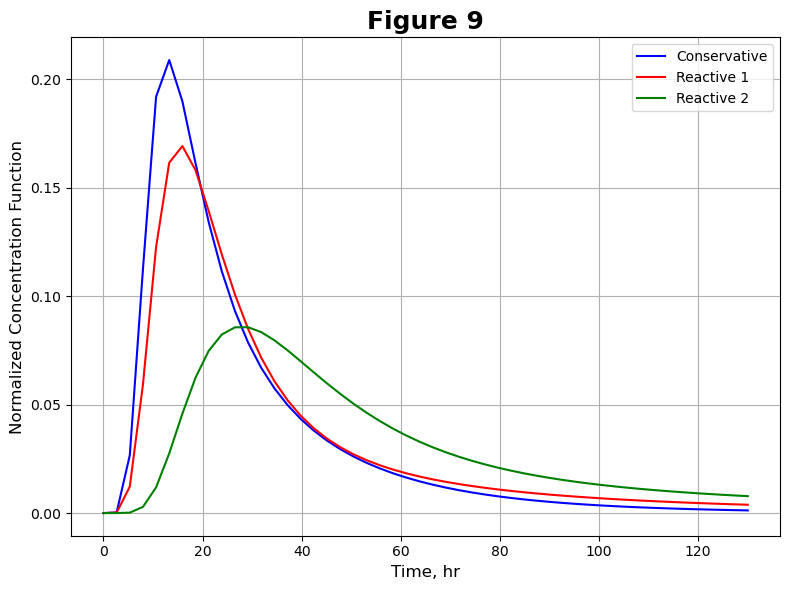

In [5]:
# --- Plot only the combined responses for each iteration ---
plt.figure(figsize=(8, 6))


fig, ax = plt.subplots(figsize=[8,6])
# plt.plot(time_points, (combined-bckgrnd_conc)/(0-bckgrnd_conc), label=f"Reactive")
# plt.plot(time_points, (combinedCons-0)/(7-0), label='Conservative')
ax.plot(time_points, (combinedCons-0)/(7-0), label='Conservative', color='blue')

# ax2 = ax.twinx()
ax.plot(time_points, (combinedReact-reactBKG)/(0-reactBKG), label=f"Reactive 1", color='red')
ax.plot(time_points, (combinedReact_2-reactBKG)/(0-reactBKG), label=f"Reactive 2", color='green')

ax.set_title("Figure 9", fontsize=18, fontweight="bold")
ax.set_xlabel("Time, hr", fontsize=12)
ax.set_ylabel("Normalized Concentration Function", fontsize=12)
# ax2.set_ylabel("Reactive Tracer", fontsize=12)

ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
